In [590]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [358]:
tfile = uproot.open('/home/Shared/lhcbdata/davinci_MC_PID.root')
tree = tfile["PiTree/DecayTree"]
df = tree.pandas.df()

In [359]:
print(df.head())

   pi_OWNPV_X  pi_OWNPV_Y  pi_OWNPV_Z  pi_OWNPV_XERR  pi_OWNPV_YERR  \
0      0.8399     -0.0781     -3.2167         0.0111         0.0111   
1      0.8399     -0.0781     -3.2167         0.0111         0.0111   
2      0.8399     -0.0781     -3.2167         0.0111         0.0111   
3      0.8399     -0.0781     -3.2167         0.0111         0.0111   
4      0.8399     -0.0781     -3.2167         0.0111         0.0111   

   pi_OWNPV_ZERR  pi_OWNPV_CHI2  pi_OWNPV_NDOF  pi_OWNPV_COV_[0][0]  \
0         0.0545      19.521955             55             0.000123   
1         0.0545      19.521955             55             0.000123   
2         0.0545      19.521955             55             0.000123   
3         0.0545      19.521955             55             0.000123   
4         0.0545      19.521955             55             0.000123   

   pi_OWNPV_COV_[0][1]    ...     runNumber  eventNumber  BCID  BCType  \
0             0.000001    ...       8352261         6001     0       3  

In [360]:
df['absid'] = df['pi_TRUEID'].abs()
print(df['absid'].value_counts())

211     60058
321     11217
0        9015
2212     6650
13       4983
11       3616
3222       34
3112       10
3312        4
Name: absid, dtype: int64


In [361]:
crit_global = (df['pi_TRACK_time_err'] > 0.1) & (df['pi_P'] > 1200)
crit_types  = (abs(df['pi_TRUEID']) == 211) | (abs(df['pi_TRUEID']) == 321)

In [362]:
dfsel = df[crit_global & crit_types]

In [363]:
attributesTRACK = ['TrackP','TrackPt','TrackChi2PerDof','TrackNumDof','TrackLikelihood','TrackFitTChi2','TrackFitTNDoF','TrackFitMatchChi2', 'TrackGhostProbability','TrackCloneDist','TrackFitVeloChi2','TrackFitVeloNDoF',]
attributesRICH = ['RichUsedAero', 'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres', 'RichAboveKaThres']
attributesDLLS = ['RichDLLe','RichDLLmu','RichDLLk','RichDLLp','RichDLLbt']
attributesCALO = ['EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe']
attributesOther = ['VeloCharge', 'pi_TRACK_time','pi_TRACK_time_err']

In [378]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

SyntaxError: invalid syntax (<ipython-input-378-cc21aad308e9>, line 2)

In [379]:
attributes = attributesTRACK + attributesRICH + attributesDLLS + attributesCALO + attributesOther
print(attributes)
print(len(attributes))

['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof', 'TrackLikelihood', 'TrackFitTChi2', 'TrackFitTNDoF', 'TrackFitMatchChi2', 'TrackGhostProbability', 'TrackCloneDist', 'TrackFitVeloChi2', 'TrackFitVeloNDoF', 'RichUsedAero', 'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres', 'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk', 'RichDLLp', 'RichDLLbt', 'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe', 'VeloCharge', 'pi_TRACK_time', 'pi_TRACK_time_err']
32


In [365]:
X = dfsel.loc[ :, attributes ]
print(X.head())

         TrackP      TrackPt  TrackChi2PerDof  TrackNumDof  TrackLikelihood  \
0  18970.029297  1237.452759         0.907122         44.0            999.0   
1   9568.049805   442.529633         0.856704         39.0            999.0   
2   4462.279785   561.040894         0.719813         37.0            999.0   
3  11481.330078   421.080994         0.980475         29.0            999.0   
4  22361.349609  3396.917236         0.779024         36.0            999.0   

   TrackFitTChi2  TrackFitTNDoF  TrackFitMatchChi2  TrackGhostProbability  \
0      20.376438           22.0           0.404741               0.002079   
1      10.704556           17.0           3.351159               0.002742   
2      17.902998           18.0           3.447850               0.003191   
3       7.674383            9.0           6.038064               0.002471   
4       9.681694           17.0           3.768179               0.002260   

   TrackCloneDist        ...            EcalPIDe   EcalPIDmu  

In [366]:
y = dfsel['absid'].astype('category')
print(y.head())

0    211
1    321
2    211
3    211
4    211
Name: absid, dtype: category
Categories (2, int64): [211, 321]


In [367]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [368]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [568]:
print("Training...")
akk=(len(attributes),int(len(attributes)-2), 10)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=akk,
                    activation='relu', solver='adam',tol=0.00001 ,
                    verbose=1., shuffle=True ,learning_rate='adaptive')#_init=0.002)#_init=stepsize(mlp.loss_curve_),n_iter_no_change=10.)  
mlp.fit(X_train, y_train.values.ravel()) 
#loss_values=mlp.loss_curve_
#lost=stepsize(loss_values)
#print (loss_values)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training...
Iteration 1, loss = 0.35196614
Iteration 2, loss = 0.19426947
Iteration 3, loss = 0.17176305
Iteration 4, loss = 0.16460925
Iteration 5, loss = 0.16005853
Iteration 6, loss = 0.15684343
Iteration 7, loss = 0.15401204
Iteration 8, loss = 0.15197994
Iteration 9, loss = 0.14959417
Iteration 10, loss = 0.14881392
Iteration 11, loss = 0.14642782
Iteration 12, loss = 0.14523271
Iteration 13, loss = 0.14449542
Iteration 14, loss = 0.14321091
Iteration 15, loss = 0.14209810
Iteration 16, loss = 0.14171744
Iteration 17, loss = 0.14029782
Iteration 18, loss = 0.13930377
Iteration 19, loss = 0.13960084
Iteration 20, loss = 0.13832759
Iteration 21, loss = 0.13773288
Iteration 22, loss = 0.13711436
Iteration 23, loss = 0.13707163
Iteration 24, loss = 0.13666113
Iteration 25, loss = 0.13635427
Iteration 26, loss = 0.13534360
Iteration 27, loss = 0.13514355
Iteration 28, loss = 0.13512407
Iteration 29, loss = 0.13467758
Iteration 30, loss = 0.13514784
Iteration 31, loss = 0.13348734
Itera

In [569]:
fig, axes = plt.subplots(32, 1)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(32,1), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

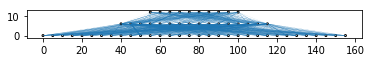

AttributeError: 'NeuralNetwork' object has no attribute 'write_png'

In [596]:
import matplotlib

network.draw()
network.write_png("exampleau")
#matplotlib.image.imsave('exampleau.png', network)

In [ ]:
matplotlib.network.imsave('name.png', array)

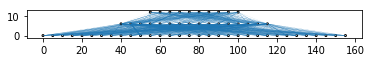

TypeError: draw_wrapper() missing 1 required positional argument: 'renderer'

<Figure size 432x288 with 0 Axes>

In [600]:
import matplotlib
from math import cos, sin, atan
from matplotlib import pyplot
ck=mlp.coefs_
lil=np.asarray(ck[0])
liol=np.asarray(ck[1])
loil=np.asarray(ck[2])
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)
class Layer():
    def __init__(self, network, number_of_neurons, weights):
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)
        self.weights = weights
    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += horizontal_distance_between_neurons
        return neurons
    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return horizontal_distance_between_neurons * (number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, linewidth):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = neuron_radius * sin(angle)
        y_adjustment = neuron_radius * cos(angle)
        line_x_data = (neuron1.x - x_adjustment, neuron2.x + x_adjustment)
        line_y_data = (neuron1.y - y_adjustment, neuron2.y + y_adjustment)
        line = pyplot.Line2D(line_x_data, line_y_data, linewidth=linewidth)
        pyplot.gca().add_line(line)

    def draw(self):
        for this_layer_neuron_index in range(len(self.neurons)):
            neuron = self.neurons[this_layer_neuron_index]
            neuron.draw()
            if self.previous_layer:
                for previous_layer_neuron_index in range(len(self.previous_layer.neurons)):
                    previous_layer_neuron = self.previous_layer.neurons[previous_layer_neuron_index]
                    weight = self.previous_layer.weights[this_layer_neuron_index, previous_layer_neuron_index]
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weight)


class NeuralNetwork():
    def __init__(self):
        self.layers = []

    def add_layer(self, number_of_neurons, weights=None):
        layer = Layer(self, number_of_neurons, weights)
        self.layers.append(layer)

    def draw(self):
        for layer in self.layers:
            layer.draw()
        pyplot.axis('scaled')
        pyplot.show()


if __name__ == "__main__":
    vertical_distance_between_layers = 6
    horizontal_distance_between_neurons = 5
    neuron_radius = 0.5
    number_of_neurons_in_widest_layer = 32
    network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
    weights1 = lil#
    weights2=liol           #
    weights3=loil           #
               #
               #
    network.add_layer(32, weights1)
    network.add_layer(16, weights2)
    network.add_layer(10, weights3)
    network.draw()
    #plt.draw()
    #kol=network#network.figure.savefig("Exampleau.png")
    kol=plt.figure()
    #kol.savefig("exambleau.png")
    #network.saveas("exaplaue.png")

In [516]:
pl=mlp.coefs_
arrz=np.asarray(pl)
print(arrz.shape)
print(len(mlp.coefs_)
     )
pl.reverse()
print(len(pl))
print(mlp.n_layers_)


(4,)
4
4
5


[-0.2760316228715818, 0.17289038758594252, 0.031192165621224455, 0.010714173243259767, 0.007548894831674174, 0.005203430167529166, 0.005002990174894362, 0.004818450280325459, 0.0033252869981849897, 0.003769153484823262, 0.003182369190282308, 0.002624983569925826, 0.0025680475070845032, 0.0019135130154621094, 0.0026278304630458216, 0.0011914499258849354, 0.0022936917227499853, 0.00069883346524241, 0.0021406327628272492, 0.0008455118380396864, 0.00042887073110767227, 0.0014950337636230326, 3.2352893415299455e-05, 0.0008515983147624473, 0.0010094257386228656, 0.0005408018400732961, -4.178876335761417e-05, 0.0007959257981434709, 0.0008220266314999114, 0.00021802671252782457, 0.00016906452967763164, 0.0006463888863875722, -0.00016181082584285078, 0.0007260552769730588, 0.0006028009800387313, -0.0005441765102221496, 0.0011039377725028388, 0.0006659564536133089, 0.000866529548203876, 0.0005027532300642401, 8.43380770891855e-05, 6.634253970125292e-05, -0.0002220393821353306, 0.0006428398528042

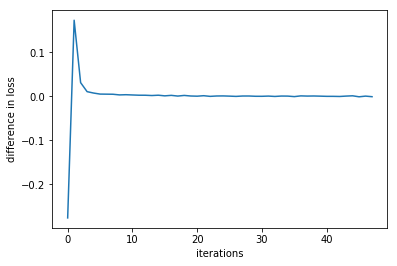

In [475]:
    plt.plot(KO)
    plt.ylabel('difference in loss')
    plt.xlabel('iterations')
    print(KO)
    

In [476]:
predictions = mlp.predict(X_test)

In [477]:
print(predictions)

[211 211 211 ... 321 211 321]


In [478]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix:")
print(confusion_matrix(y_test,predictions))
print("Classification report:")
print(classification_report(y_test,predictions))


Confusion matrix:
[[12798   183]
 [  598  1801]]
Classification report:
             precision    recall  f1-score   support

        211       0.96      0.99      0.97     12981
        321       0.91      0.75      0.82      2399

avg / total       0.95      0.95      0.95     15380



In [479]:
probabilities = mlp.predict_proba(X_test) # gives list of [prob_pion, prob_kaon]
class_var = np.array( [ probabilities[i][0] for i in range(len(y_test)) ] )
df_test = pd.DataFrame(data=X_test, columns=attributes)
df_test["myMLP"] = class_var
df_test["absid"] = y_test
print(y_test.head())

63808    211
1629     211
59083    211
49513    211
38535    321
Name: absid, dtype: category
Categories (2, int64): [211, 321]


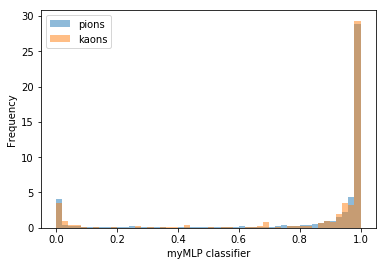

In [480]:
crit_pion = df_test['absid'] == 211
crit_kaon = df_test['absid'] == 321
df_test_pions = df_test[crit_pion]
df_test_kaons = df_test[crit_kaon]

df_test_pions["myMLP"].plot.hist(bins=50, range=(0,1), alpha=0.5, density=True, label="pions")
df_test_kaons["myMLP"].plot.hist(bins=50, range=(0,1), alpha=0.5, density=True, label="kaons")
plt.legend(loc='upper left')
plt.xlabel("myMLP classifier")
plt.show()

In [33]:
ff = plt.figure()
ff.savefig("myMLP_performance.pdf", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

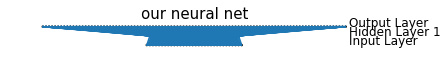

In [553]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'our neural net', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()
        
network1 = DrawNN( akk )
network1.draw()
